In [ ]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.7MB 13.0MB/s 
  Found existing installation: tensorflow-datasets 4.0.1
    Uninstalling tensorflow-datasets-4.0.1:
      Successfully uninstalled tensorflow-datasets-4.0.1


# [**Classification**](https://)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import math 

Loading and spliting data

In [ ]:
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
print("dataset ", dataset)
print(type(dataset))
print("metadata ", metadata)
print(type(metadata))
train_dataset, test_dataset = dataset["train"], dataset["test"]



Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
dataset  {Split('train'): <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>, Split('test'): <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>}
<class 'dict'>
metadata  tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path='/root/tensorflow_datasets/fashion_mnist/3.0.1',
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dt

In [ ]:
print("train dataset ", train_dataset)
print(type(train_dataset))
cloth_classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Skirt", "Sneaker", "Bag", "Ankle boot"]
num_train = metadata.splits["train"]
num_test = metadata.splits["test"]
print(num_train)
print(num_test)

train dataset  <PrefetchDataset shapes: ((28, 28, 1), ()), types: (tf.uint8, tf.int64)>
<class 'tensorflow.python.data.ops.dataset_ops.PrefetchDataset'>
<SplitInfo num_examples=60000, num_shards=1>
<SplitInfo num_examples=10000, num_shards=1>


Data preparation

In [ ]:
def normalize(images, label):
  images = tf.cast(images, float)
  print(type(images))
  images /=255
  return images, label

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)



<class 'tensorflow.python.framework.ops.Tensor'>
<class 'tensorflow.python.framework.ops.Tensor'>


shape of image  (28, 28, 1)
tf.Tensor(
[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.07058824]
  [0.3019608 ]
  [0.8901961 ]
  [0.8901961 ]
  [0.8156863 ]
  [0.8235294 ]
  [0.88235295]
  [0.84705883]
  [0.33333334]
  [0.1254902 ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.23921569]
  [0.39215687]
  [0.38039216]
  [0.3137255 ]
  [0.22352941]
  [0.45882353]
  [0.8901961 ]
  [0.93333334]
  [0.4509804 ]
  [0.19215687]
  [0.30588236]
  [0.41568628]
  [0.42352942]
  [0.2784314 ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.31764707]
  [0.4117647

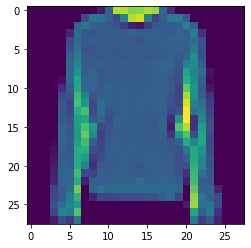

In [ ]:

for image, label in train_dataset.take(1):
    print("shape of image ", np.shape(image))
    break
print(image)
print("type(image)", type(image))
print(label)

print("type(label)", type(label))
image = np.reshape(image, newshape=(28, 28))
plt.imshow(image)



In [ ]:
model = tf.keras.Sequential(layers=[
      tf.keras.layers.Conv2D(32, (3,3), padding="same", activation=tf.nn.relu, input_shape=(28, 28, 1)),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
      tf.keras.layers.Conv2D(64, (3,3), padding="same", activation=tf.nn.relu),
      tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(units=128, activation=tf.nn.relu),
      tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
np.shape(train_dataset)

()

In [ ]:
train_dataset = train_dataset.repeat().shuffle(6000).batch(32)
test_dataset  = test_dataset.batch(32)
model.fit(train_dataset, epochs=10, steps_per_epoch=math.ceil(6000/32))

Epoch 1/10
188/188 [==============================] - 9s 43ms/step - loss: 1.0062 - accuracy: 0.6364
Epoch 2/10
188/188 [==============================] - 8s 42ms/step - loss: 0.5019 - accuracy: 0.8180
Epoch 3/10
188/188 [==============================] - 8s 41ms/step - loss: 0.4747 - accuracy: 0.8348
Epoch 4/10
188/188 [==============================] - 8s 41ms/step - loss: 0.3852 - accuracy: 0.8604
Epoch 5/10
188/188 [==============================] - 8s 41ms/step - loss: 0.3926 - accuracy: 0.8603
Epoch 6/10
188/188 [==============================] - 8s 40ms/step - loss: 0.3611 - accuracy: 0.8697
Epoch 7/10
188/188 [==============================] - 8s 41ms/step - loss: 0.3558 - accuracy: 0.8770
Epoch 8/10
188/188 [==============================] - 8s 41ms/step - loss: 0.2951 - accuracy: 0.9015
Epoch 9/10
188/188 [==============================] - 8s 41ms/step - loss: 0.3063 - accuracy: 0.8860
Epoch 10/10
188/188 [==============================] - 7s 39ms/step - loss: 0.3003 - accura

In [ ]:
print(type(train_dataset))

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>


In [ ]:
model.evaluate(test_dataset, steps=math.ceil(1000/32))

32/32 [==============================] - 1s 14ms/step - loss: 0.3035 - accuracy: 0.8838


[0.30352550745010376, 0.8837890625]

In [ ]:
for test_image, test_label in test_dataset.take(1):
    model_predict = model.predict(test_image)
    print(model_predict)
    print(model_predict.shape)
    

[[4.94626933e-04 6.06670277e-04 5.31053394e-02 7.12636800e-04
  7.27827728e-01 4.79557712e-05 2.13778526e-01 1.69994528e-05
  3.36272991e-03 4.68484941e-05]
 [9.47189037e-05 5.40698711e-05 3.80655867e-03 8.83964894e-05
  4.70057607e-01 4.38537018e-06 5.25517583e-01 3.51751083e-07
  3.72924667e-04 3.37907022e-06]
 [1.05314626e-04 2.13847034e-05 2.12217274e-05 2.63096554e-05
  9.53975541e-06 3.14160921e-02 5.19836904e-05 3.95846441e-02
  8.13902728e-03 9.20624495e-01]
 [1.33885860e-05 4.40403119e-06 5.88771763e-06 7.71349823e-06
  1.04009714e-05 2.00685747e-02 7.11877328e-06 8.20896149e-01
  4.14238684e-03 1.54843956e-01]
 [7.24330846e-07 5.09558884e-09 9.33363609e-09 1.34219846e-09
  1.71213876e-10 9.99998093e-01 8.23222468e-09 1.27627828e-07
  8.22081802e-07 2.21937213e-07]
 [2.97422645e-07 9.99927282e-01 6.65442670e-08 1.21039029e-05
  5.93628320e-05 1.39111336e-08 7.04244769e-07 1.90041121e-08
  1.20258008e-07 2.00343142e-09]
 [9.91898060e-01 1.27865760e-05 6.21358515e-04 1.65552599e

In [15]:
print(model_predict[0].shape)
print(model_predict[0])
print(np.argmax(model_predict[0]))
print(test_label[0])

(10,)
[4.9462693e-04 6.0667028e-04 5.3105339e-02 7.1263680e-04 7.2782773e-01
 4.7955771e-05 2.1377853e-01 1.6999453e-05 3.3627299e-03 4.6848494e-05]
4
tf.Tensor(4, shape=(), dtype=int64)
